all exercises based on [Introduction to Deep Learning for NLP](https://wikidocs.net/111472)

In [1]:
import tensorflow as tf

In [3]:
# tape_gradient() : 자동 미분 기능 수행
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

with tf.GradientTape() as tape:
    z = f(w)
    
gradients = tape.gradient(z, [w]) # z를 w에 대해 미분
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 자동 미분을 이용한 선형 회귀 구현

In [4]:
# 학습될 가중치 변수 선언
# 학습될 값이므로 일단 임의의 값으로 설정
W = tf.Variable(4.0)
b = tf.Variable(1.0) # 이렇게 tf.Variable로 하는 이유? 학습될 매개변수. 그냥 숫자 할당하면 뒤에 리스트를 변수로 넣었을 때 안돌아감 * 표시를 리스트 곱하는 걸로 인식해서?!

In [5]:
@tf.function # 이건 뭐지 (https://www.tensorflow.org/guide/function?hl=ko) -> 코랩에서 실습
def hypothesis(x):
    return W*x + b

In [6]:
x_test = [5,3.5, 5.5,6]
print(hypothesis(x_test).numpy())

[21. 15. 23. 25.]


In [11]:
# practice
# W_ = 4
# b_ = 1
# def f(x):
#     return W_*x + b_
# print(f(x_test).numpy())
# ----> error

In [12]:
@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [13]:
# 데이터
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부 시간
y = [11, 22, 33, 44, 55, 66, 77, 87, 95] # 각 공부 시간에 맵핑되는 성적

In [16]:
optimizer = tf.optimizers.SGD(0.01) # optimizer은 경사하강법, 학습률 0.01

In [19]:
W.numpy() # 그냥 W 만 쓰면 tf.Variable 객체라 숫자 값이 안 나옴

10.636882

In [20]:
# 300번에 걸쳐 경사하강법 수행할 것
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(X)
        if i%10 == 0:
            print("epoch : {:3} | y_pred : ".format(i), y_pred)
        # 평균 제곱 오차 계산
        cost = mse_loss(y_pred, y)
        if i%10 == 0:
            print("epoch : {:3} | cost :".format(i), cost)
        
    # 손실 함수에 대한 파라미터의 미분값 계산 (W, b에 대해 모두 gradients를 구하나? 왜 gradients가 2개의 element로 구성된 것인지)
    gradients = tape.gradient(cost, [W, b]) # 왜 with 사용하는 범위 안에서 안 쓰고 밖에서 tape를 쓰지??
    if i%10 == 0:
        print("epoch : {:3} | gradients: ".format(i), gradients)
    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [W,b])) # zip 기능?
    
    if i%10 ==0:
        print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4f} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))
        
# W, b 값이 업데이트됨에 따라 cost가 지속적으로 줄어듦.

epoch :   0 | y_pred :  tf.Tensor(
[11.956942 22.593822 33.230705 43.867588 54.50447  65.14135  75.77824
 86.415115 97.051994], shape=(9,), dtype=float32)
epoch :   0 | cost : tf.Tensor(0.92971396, shape=(), dtype=float32)
epoch :   0 | gradients:  [<tf.Tensor: shape=(), dtype=float32, numpy=-0.019103527>, <tf.Tensor: shape=(), dtype=float32, numpy=0.120049804>]
epoch :   0 | W의 값 : 10.6371 | b의 값 : 1.3189 | cost : 0.929714
epoch :  10 | y_pred :  tf.Tensor(
[11.947029 22.585785 33.22454  43.863297 54.502052 65.14081  75.779564
 86.41832  97.057076], shape=(9,), dtype=float32)
epoch :  10 | cost : tf.Tensor(0.92829484, shape=(), dtype=float32)
epoch :  10 | gradients:  [<tf.Tensor: shape=(), dtype=float32, numpy=-0.018288612>, <tf.Tensor: shape=(), dtype=float32, numpy=0.11521575>]
epoch :  10 | W의 값 : 10.6389 | b의 값 : 1.3071 | cost : 0.928295
epoch :  20 | y_pred :  tf.Tensor(
[11.937516 22.57807  33.218624 43.859177 54.49973  65.14029  75.78084
 86.421394 97.06195 ], shape=(9,), dtyp

epoch : 230 | y_pred :  tf.Tensor(
[11.806503 22.471813 33.13712  43.80243  54.46774  65.13305  75.79836
 86.46367  97.128975], shape=(9,), dtype=float32)
epoch : 230 | cost : tf.Tensor(0.91443485, shape=(), dtype=float32)
epoch : 230 | gradients:  [<tf.Tensor: shape=(), dtype=float32, numpy=-0.00736475>, <tf.Tensor: shape=(), dtype=float32, numpy=0.046591014>]
epoch : 230 | W의 값 : 10.6654 | b의 값 : 1.1407 | cost : 0.914435
epoch : 240 | y_pred :  tf.Tensor(
[11.802657 22.468693 33.134727 43.800762 54.466797 65.132835 75.79887
 86.464905 97.13094 ], shape=(9,), dtype=float32)
epoch : 240 | cost : tf.Tensor(0.9142253, shape=(), dtype=float32)
epoch : 240 | gradients:  [<tf.Tensor: shape=(), dtype=float32, numpy=-0.0070972443>, <tf.Tensor: shape=(), dtype=float32, numpy=0.044708073>]
epoch : 240 | W의 값 : 10.6661 | b의 값 : 1.1362 | cost : 0.914225
epoch : 250 | y_pred :  tf.Tensor(
[11.798965 22.465698 33.13243  43.799164 54.465897 65.13263  75.79936
 86.466095 97.13283 ], shape=(9,), dtype

zip(*iterable)은 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수이다.

※ 여기서 사용한 *iterable은 반복 가능(iterable)한 자료형 여러 개를 입력할 수 있다는 의미이다.

잘 이해되지 않는다면 다음 예제를 살펴보자.
```
>>> list(zip([1, 2, 3], [4, 5, 6]))
[(1, 4), (2, 5), (3, 6)]
>>> list(zip([1, 2, 3], [4, 5, 6], [7, 8, 9]))
[(1, 4, 7), (2, 5, 8), (3, 6, 9)]
>>> list(zip("abc", "def"))
[('a', 'd'), ('b', 'e'), ('c', 'f')]
```

In [22]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.45702  54.461834 59.796772 65.131714]


### 케라스로 구현하기 (선형회귀)

In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [24]:
X=[1,2,3,4,5,6,7,8,9] # 공부 시간
y=[11,22,33,44,55,66,77,87,95] # 각 공부시간에 맵핑된 성적

model = Sequential()

# 입력 x의 차원 1 출력 y의 차원 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim = 1, activation = 'linear'))

# sgd는 경사하강법. learning rate 0.01
sgd = optimizers.SGD(lr = 0.01)

# 손실함수는 mse (평균 제곱 오차)
model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])

# 주어진 X와 y 데이터에 대해 오차 최소화 작업 300번
model.fit(X,y, batch_size = 1, epochs = 300, shuffle=False) # batch size?

Epoch 1/300
9/9 [==============================] - 0s 885us/step - loss: 375.4327 - mse: 375.4327
Epoch 2/300
9/9 [==============================] - 0s 776us/step - loss: 1.8896 - mse: 1.8896
Epoch 3/300
9/9 [==============================] - 0s 666us/step - loss: 1.8891 - mse: 1.8891
Epoch 4/300
9/9 [==============================] - 0s 667us/step - loss: 1.8886 - mse: 1.8886
Epoch 5/300
9/9 [==============================] - 0s 781us/step - loss: 1.8882 - mse: 1.8882
Epoch 6/300
9/9 [==============================] - 0s 780us/step - loss: 1.8877 - mse: 1.8877
Epoch 7/300
9/9 [==============================] - 0s 894us/step - loss: 1.8873 - mse: 1.8873
Epoch 8/300
9/9 [==============================] - 0s 778us/step - loss: 1.8869 - mse: 1.8869
Epoch 9/300
9/9 [==============================] - 0s 778us/step - loss: 1.8865 - mse: 1.8865
Epoch 10/300
9/9 [==============================] - 0s 777us/step - loss: 1.8861 - mse: 1.8861
Epoch 11/300
9/9 [==============================] - 0s 

9/9 [==============================] - 0s 777us/step - loss: 1.8755 - mse: 1.8755
Epoch 88/300
9/9 [==============================] - 0s 669us/step - loss: 1.8755 - mse: 1.8755
Epoch 89/300
9/9 [==============================] - 0s 782us/step - loss: 1.8754 - mse: 1.8754
Epoch 90/300
9/9 [==============================] - 0s 890us/step - loss: 1.8754 - mse: 1.8754
Epoch 91/300
9/9 [==============================] - 0s 776us/step - loss: 1.8754 - mse: 1.8754
Epoch 92/300
9/9 [==============================] - 0s 773us/step - loss: 1.8754 - mse: 1.8754
Epoch 93/300
9/9 [==============================] - 0s 667us/step - loss: 1.8753 - mse: 1.8753
Epoch 94/300
9/9 [==============================] - 0s 667us/step - loss: 1.8753 - mse: 1.8753
Epoch 95/300
9/9 [==============================] - 0s 891us/step - loss: 1.8753 - mse: 1.8753
Epoch 96/300
9/9 [==============================] - 0s 774us/step - loss: 1.8753 - mse: 1.8753
Epoch 97/300
9/9 [==============================] - 0s 669us/st

9/9 [==============================] - 0s 668us/step - loss: 1.8747 - mse: 1.8747
Epoch 173/300
9/9 [==============================] - 0s 778us/step - loss: 1.8747 - mse: 1.8747
Epoch 174/300
9/9 [==============================] - 0s 663us/step - loss: 1.8747 - mse: 1.8747
Epoch 175/300
9/9 [==============================] - 0s 666us/step - loss: 1.8747 - mse: 1.8747
Epoch 176/300
9/9 [==============================] - 0s 782us/step - loss: 1.8747 - mse: 1.8747
Epoch 177/300
9/9 [==============================] - 0s 774us/step - loss: 1.8747 - mse: 1.8747
Epoch 178/300
9/9 [==============================] - 0s 665us/step - loss: 1.8747 - mse: 1.8747
Epoch 179/300
9/9 [==============================] - 0s 559us/step - loss: 1.8747 - mse: 1.8747
Epoch 180/300
9/9 [==============================] - 0s 672us/step - loss: 1.8747 - mse: 1.8747
Epoch 181/300
9/9 [==============================] - 0s 773us/step - loss: 1.8747 - mse: 1.8747
Epoch 182/300
9/9 [==============================] - 0

9/9 [==============================] - 0s 665us/step - loss: 1.8746 - mse: 1.8746
Epoch 258/300
9/9 [==============================] - 0s 665us/step - loss: 1.8746 - mse: 1.8746
Epoch 259/300
9/9 [==============================] - 0s 667us/step - loss: 1.8746 - mse: 1.8746
Epoch 260/300
9/9 [==============================] - 0s 778us/step - loss: 1.8746 - mse: 1.8746
Epoch 261/300
9/9 [==============================] - 0s 670us/step - loss: 1.8746 - mse: 1.8746
Epoch 262/300
9/9 [==============================] - 0s 666us/step - loss: 1.8746 - mse: 1.8746
Epoch 263/300
9/9 [==============================] - 0s 555us/step - loss: 1.8746 - mse: 1.8746
Epoch 264/300
9/9 [==============================] - 0s 886us/step - loss: 1.8746 - mse: 1.8746
Epoch 265/300
9/9 [==============================] - 0s 778us/step - loss: 1.8746 - mse: 1.8746
Epoch 266/300
9/9 [==============================] - 0s 668us/step - loss: 1.8746 - mse: 1.8746
Epoch 267/300
9/9 [==============================] - 0

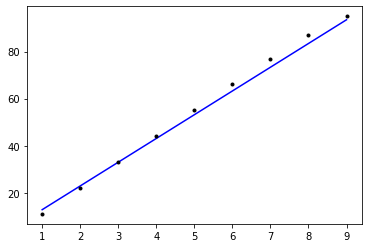

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y,'k.') # b: blue, k.: black point marker 이런 형식으로 이어서 써도 올라가는가봥

In [26]:
print(model.predict([9.5])) # 9.5시간 공부하면 몇 점 나올까

[[98.55561]]
